In [1]:
# Import Libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import sqlite3
import folium
from geopy.geocoders import Nominatim
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Creating database connection using sqlite:
conn = sqlite3.connect('yelp.db')

In [3]:
#Explore tables in the database:
tables = pd.read_sql_query("SELECT name from sqlite_master where type = 'table'",conn)

In [4]:
print(type(tables))
tables

<class 'pandas.core.frame.DataFrame'>


,name
0,business
1,checkin
2,review
3,tips
4,users


In [5]:
# Explore what type of data is available in the tables:
# Also make sure not loading all the data as it is approx. 5GB
for table in tables['name']:
    display(pd.read_sql_query(f"select * from {table} limit 5", conn))

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [6]:
# Total number of rows in business table:
pd.read_sql_query("select count(*) from business", conn)

,count(*)
0,150346


In [7]:
# Total number of rows corresponding to 'Restaurant' category which are still running business:
restaurant_business = pd.read_sql_query("""select business_id, review_count from business where lower(categories) like '%restaurant%' and is_open=1""", conn)

In [8]:
restaurant_business

,business_id,review_count
0,MTSW4McQd7CbVtyjqoe9mw,80
1,CF33F8-E6oudUQ46HnavjQ,6
2,bBDDEgkFA1Otx9Lfe7BZUQ,10
3,eEOYSgkmpB90uNA7lDOMRA,10
4,il_Ro8jwPlHresjw9EGmBg,28
...,...,...
34999,w_4xUt-1AyY2ZwKtnjW0Xg,998
35000,l9eLGG9ZKpLJzboZq-9LRQ,11
35001,cM6V90ExQD6KMSU3rRB5ZA,33
35002,WnT9NIzQgLlILjPT0kEcsQ,35


In [9]:
# Calculate descriptive statistics(avg, min, max, median) for review_count and star_rating to assess the presence of outliers in them?
pd.read_sql_query(f"""
                  SELECT 
                  AVG(review_count) AS average_review_count, 
                  MIN(review_count) AS min_review_count, 
                  MAX(review_count) AS max_review_count, 
                  (SELECT review_count from business ORDER BY review_count LIMIT 1 OFFSET (SELECT COUNT(*) FROM business)/2) AS median_review_count,
                  
                  AVG(stars) AS average_star_rating,
                  MIN(stars) AS min_star_rating,
                  MAX(stars) AS max_star_rating,
                  (SELECT stars from business ORDER BY stars LIMIT 1 OFFSET (SELECT COUNT(*) FROM business)/2) AS median_star_rating
                  FROM business 
                  WHERE business_id IN {tuple(restaurant_business['business_id'])};
                  """, conn).transpose()

,0
average_review_count,104.097789
min_review_count,5.000000
max_review_count,7568.000000
median_review_count,15.000000
average_star_rating,3.523969
min_star_rating,1.000000
max_star_rating,5.000000
median_star_rating,3.500000


In [10]:
# Remove outliers in the review_count using interquantile range:
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25) #25%
    q3 = df[col].quantile(0.75) #75%
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [11]:
restaurant_business = remove_outliers(restaurant_business, 'review_count')

In [12]:
restaurant_business.shape

(31537, 2)

In [13]:
# Once again check for outliers:
# Calculate descriptive statistics(avg, min, max, median) for review_count and star_rating to assess the presence of outliers in them?
pd.read_sql_query(f"""
                  SELECT 
                  AVG(review_count) AS average_review_count, 
                  MIN(review_count) AS min_review_count, 
                  MAX(review_count) AS max_review_count, 
                  (SELECT review_count from business ORDER BY review_count LIMIT 1 OFFSET (SELECT COUNT(*) FROM business)/2) AS median_review_count,
                  
                  AVG(stars) AS average_star_rating,
                  MIN(stars) AS min_star_rating,
                  MAX(stars) AS max_star_rating,
                  (SELECT stars from business ORDER BY stars LIMIT 1 OFFSET (SELECT COUNT(*) FROM business)/2) AS median_star_rating
                  FROM business 
                  WHERE business_id IN {tuple(restaurant_business['business_id'])};
                  """, conn).transpose()

,0
average_review_count,55.975426
min_review_count,5.000000
max_review_count,248.000000
median_review_count,15.000000
average_star_rating,3.477281
min_star_rating,1.000000
max_star_rating,5.000000
median_star_rating,3.500000


In [14]:
# Which restaurants have the highest number of reviews?
pd.read_sql_query(f"""
                  SELECT 
                  name, 
                  SUM(review_count) AS branches_review_count, 
                  AVG(stars) AS average_rating
                  FROM business
                  WHERE business_id IN {tuple(restaurant_business['business_id'])}
                  GROUP BY name
                  ORDER BY branches_review_count desc 
                  LIMIT 10
                  """, conn)

,name,branches_review_count,average_rating
0,McDonald's,16490,1.868702
1,Chipotle Mexican Grill,9071,2.381757
2,Taco Bell,8017,2.141813
3,Chick-fil-A,7687,3.377419
4,First Watch,6761,3.875000
5,Panera Bread,6613,2.661905
6,Buffalo Wild Wings,6483,2.344828
7,Domino's Pizza,6091,2.290210
8,Wendy's,5930,2.030159
9,Chili's,5744,2.514706


In [15]:
# Which restaurants have the highest number of star ratings?
pd.read_sql_query(f"""
                  SELECT 
                  name, 
                  SUM(review_count) AS branches_review_count, 
                  AVG(stars) AS average_rating
                  FROM business
                  WHERE business_id IN {tuple(restaurant_business['business_id'])}
                  GROUP BY name
                  ORDER BY average_rating desc 
                  LIMIT 10
                  """, conn)

,name,branches_review_count,average_rating
0,ā café,48,5.0
1,two birds cafe,77,5.0
2,the brewers cabinet production,13,5.0
3,taqueria la cañada,17,5.0
4,la bamba,44,5.0
5,la 5th av tacos,24,5.0
6,el sabor mexican and chinese food,21,5.0
7,eat.drink.Om...YOGA CAFE,7,5.0
8,d4 Tabletop Gaming Cafe,8,5.0
9,cabbage vegetarian cafe,12,5.0


In [16]:
# Restaurants with higher engagement(like check-in's)?
pd.read_sql_query("""SELECT 
                  business_id,
                  SUM(length(date) - length(replace(date,',',''))+1) AS checkin_count
                  FROM checkin
                  GROUP BY business_id
                  """, conn)

,business_id,checkin_count
0,---kPU91CF4Lq2-WlRu9Lw,11
1,--0iUa4sNDFiZFrAdIWhZQ,10
2,--30_8IhuyMHbSOcNWd6DQ,2
3,--7PUidqRWpRSpXebiyxTg,10
4,--7jw19RH9JKXgFohspgQw,26
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,67
131926,zznZqH9CiAznbkV6fXyHWA,1
131927,zzu6_r3DxBJuXcjnOYVdTw,23
131928,zzw66H6hVjXQEt0Js3Mo4A,2


In [17]:
# Restaurants with higher engagement(like tip_count's)?
pd.read_sql_query("""SELECT 
                  business_id,
                  count(*) AS tip_counts
                  FROM tips
                  GROUP BY business_id
                  """, conn)

,business_id,tip_counts
0,---kPU91CF4Lq2-WlRu9Lw,4
1,--0iUa4sNDFiZFrAdIWhZQ,6
2,--30_8IhuyMHbSOcNWd6DQ,1
3,--7PUidqRWpRSpXebiyxTg,3
4,--8IbOsAAxjKRoYsBFL-PA,4
...,...,...
106188,zzjCxn89a7RQo8keIOO_Ag,1
106189,zzjFdJwXuxBOGe9JeY_EMw,2
106190,zznJox6-nmXlGYNWgTDwQQ,6
106191,zzu6_r3DxBJuXcjnOYVdTw,2


In [18]:
# Do restaurants with higher engagements(like checkin's, tip-counts) tend to have higher ratings?
avg_user_engagement_df= pd.read_sql_query(f""" SELECT total.avg_rating AS rating,
                  AVG(total.review_count) AS avg_review_count,
                  AVG(total.checkin_count) AS avg_checkin_count,
                  AVG(total.tip_count) AS avg_tip_count
                  FROM
                  (SELECT 
                    b.business_id,
                    SUM(b.review_count) AS review_count,
                    AVG(b.stars) AS avg_rating,
                    SUM(LENGTH(cc.date)-LENGTH(REPLACE(cc.date,',',''))+1) AS checkin_count,
                    SUM(tip.tip_count) AS tip_count
                    FROM business b
                    LEFT JOIN checkin cc ON cc.business_id = b.business_id
                    LEFT JOIN (select business_id, COUNT(business_id) AS tip_count 
                               FROM tips 
                               GROUP BY business_id 
                               ORDER BY tip_count) AS tip ON b.business_id = tip.business_id
                    WHERE b.business_id IN {tuple(restaurant_business['business_id'])}
                    GROUP BY b.business_id) AS total
                    GROUP BY total.avg_rating
                  """, conn)

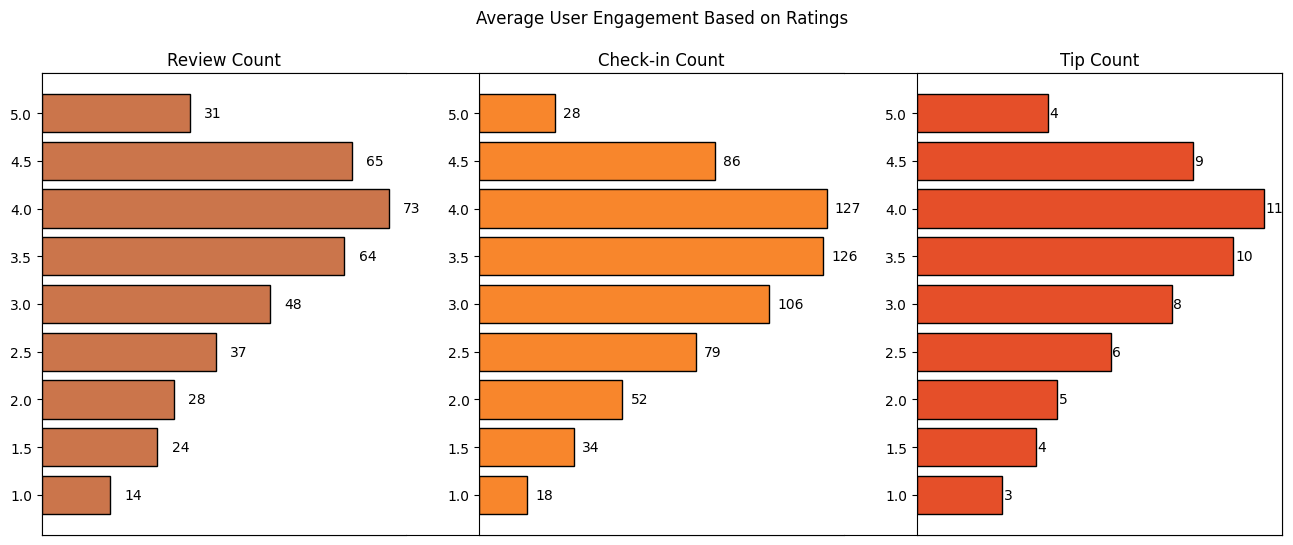

In [19]:
plt.figure(figsize=(16,6))
plt.title('Average User Engagement Based on Ratings\n\n')
plt.yticks([])
plt.xticks([])

plt.subplot(1,3,1)
plt.title('Review Count')
plt.xticks([])
plt.barh(avg_user_engagement_df['rating'].astype('str'), 
         avg_user_engagement_df['avg_review_count'],
         edgecolor = 'k', 
         color='#CB754B')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate(avg_user_engagement_df['avg_review_count']):
    plt.text(value+3, i, str(round(value)), color='black', va = 'center')

plt.subplot(1,3,2)
plt.title('Check-in Count')
plt.xticks([])
plt.barh(avg_user_engagement_df['rating'].astype('str'), 
         avg_user_engagement_df['avg_checkin_count'],
         edgecolor = 'k', 
         color='#F8862C')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate(avg_user_engagement_df['avg_checkin_count']):
    plt.text(value+3, i, str(round(value)), color='black', va = 'center')

plt.subplot(1,3,3)
plt.title('Tip Count')
plt.xticks([])
plt.barh(avg_user_engagement_df['rating'].astype('str'), 
         avg_user_engagement_df['avg_tip_count'],
         edgecolor = 'k', 
         color='#E54F29')
for i, value in enumerate(avg_user_engagement_df['avg_tip_count']):
    plt.text(value+0.05, i, str(round(value)), color='black', va = 'center')
plt.show()

In [20]:
# Checking for a correlation between the number of reviews, check-in's and tips for a business?
user_engagement_df= pd.read_sql_query(f"""SELECT 
                    b.business_id,
                    SUM(b.review_count) AS review_count,
                    AVG(b.stars) AS avg_rating,
                    SUM(LENGTH(cc.date)-LENGTH(REPLACE(cc.date,',',''))+1) AS checkin_count,
                    SUM(tip.tip_count) AS tip_count
                    FROM business b
                    LEFT JOIN checkin cc ON cc.business_id = b.business_id
                    LEFT JOIN (select 
                               business_id, 
                               COUNT(business_id) AS tip_count 
                               FROM tips 
                               GROUP BY business_id 
                               ORDER BY tip_count) AS tip ON b.business_id = tip.business_id
                    WHERE b.business_id IN {tuple(restaurant_business['business_id'])}
                    GROUP BY b.business_id
                  """, conn)

In [21]:
corr_user_eng_df=user_engagement_df[['review_count', 'checkin_count', 'tip_count']].corr()

<Axes: >

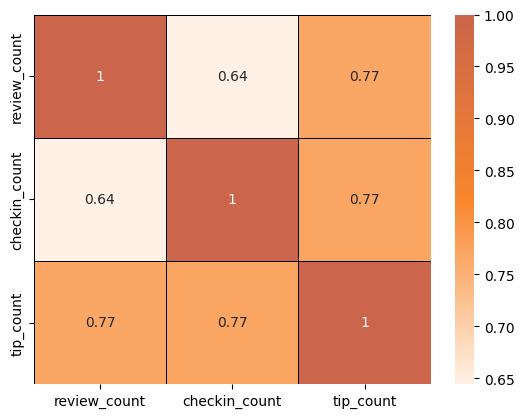

In [22]:
# Plot correlation using colormap:
colors = ['#FFF1E5', '#F8862C', '#CB654B']
custom_cmap = LinearSegmentedColormap.from_list('mycmap', colors)
sns.heatmap(corr_user_eng_df, 
            cmap=custom_cmap, 
            annot=True, 
            linewidths=0.5, 
            linecolor='black')

In [23]:
# Is there a difference in the user engagement(reviews, tips, check-in's) between high-rated and low-rated businesses?
pd.read_sql_query(f"""SELECT 
                    b.business_id,
                    SUM(b.review_count) AS review_count,
                    AVG(b.stars) AS avg_rating,
                    SUM(LENGTH(cc.date)-LENGTH(REPLACE(cc.date,',',''))+1) AS checkin_count,
                    SUM(tip.tip_count) AS tip_count,
                    CASE WHEN b.stars >= 3.5 Then 'High-Rated' ELSE 'Low-Rated' END AS category
                  FROM 
                    business b
                  LEFT JOIN 
                    checkin cc ON cc.business_id = b.business_id
                  LEFT JOIN 
                    (select business_id, 
                            COUNT(business_id) AS tip_count 
                            FROM tips 
                            GROUP BY business_id 
                            ORDER BY tip_count) AS tip ON b.business_id = tip.business_id
                  WHERE b.business_id IN {tuple(restaurant_business['business_id'])}
                  GROUP BY b.business_id
                  """, conn).dropna()

,business_id,review_count,avg_rating,checkin_count,tip_count,category
0,---kPU91CF4Lq2-WlRu9Lw,24,4.5,11.0,4.0,High-Rated
1,--0iUa4sNDFiZFrAdIWhZQ,14,3.0,10.0,6.0,Low-Rated
2,--epgcb7xHGuJ-4PUeSLAw,34,3.0,118.0,6.0,Low-Rated
4,--lqIzK-ZVTtgwiQM63XgQ,15,2.0,21.0,2.0,Low-Rated
5,-09Oc2D14vRnmirPh0vlXw,135,3.0,500.0,25.0,Low-Rated
...,...,...,...,...,...,...
31530,zzIF9qp2UoHN48EeZH_IDg,19,3.0,6.0,5.0,Low-Rated
31532,zzbZtgPYZS8sTIWQH6DwEw,86,3.0,292.0,17.0,Low-Rated
31533,zziDpuuJw-Km1J4BaGpBKA,6,3.5,20.0,2.0,High-Rated
31534,zzjFdJwXuxBOGe9JeY_EMw,47,4.0,27.0,2.0,High-Rated


In [24]:
user_engagement_df= pd.read_sql_query(f"""SELECT 
                    b.business_id,
                    SUM(b.review_count) AS review_count,
                    AVG(b.stars) AS avg_rating,
                    SUM(LENGTH(cc.date)-LENGTH(REPLACE(cc.date,',',''))+1) AS checkin_count,
                    SUM(tip.tip_count) AS tip_count,
                    CASE WHEN b.stars >= 3.5 Then 'High-Rated' ELSE 'Low-Rated' END AS category
                    FROM business b
                    LEFT JOIN checkin cc ON cc.business_id = b.business_id
                    LEFT JOIN (select 
                               business_id, 
                               COUNT(business_id) AS tip_count 
                               FROM tips 
                               GROUP BY business_id 
                               ORDER BY tip_count) AS tip ON b.business_id = tip.business_id
                    WHERE b.business_id IN {tuple(restaurant_business['business_id'])}
                    GROUP BY b.business_id
                  """, conn)

In [25]:
user_engagement_df.groupby("category")[['review_count', 'tip_count', 'checkin_count']].mean()

,review_count,tip_count,checkin_count
category,,,
High-Rated,65.785335,10.113025,111.07557
Low-Rated,37.726646,6.506592,79.00000


In [26]:
# Function to calculate the success score based on the avg rating and total review count:
def calculate_success_metric(df):
    success_score = []
    for index, row in df.iterrows():
        score = row['avg_rating'] * np.log(row['review_count'] + 1)
        success_score.append(score)
    return success_score

In [27]:
# How does success metrics(review_count or avg_rating) of restaurants vary across different states and cities:
city_df = pd.read_sql_query(f"""
                  SELECT city, 
                        state, 
                        latitude, 
                        longitude, 
                        AVG(stars) AS avg_rating, SUM(review_count),
                        SUM(review_count) AS review_count,
                        COUNT(*) AS restaurant_count
                    FROM business
                    WHERE business_id IN {tuple(restaurant_business['business_id'])}
                    GROUP BY state, city
                    ORDER BY review_count desc
                    LIMIT 10
                    """, conn)

city_df['success_score'] = calculate_success_metric(city_df)

In [28]:
# Create a base map:
m = folium.Map(location=[city_df['latitude'].mean(), city_df['longitude'].mean()],
               zoom_start=4)
# Define a color scale:
color_scale = folium.LinearColormap(colors=['red', 'yellow', 'green'],
                                    vmin= city_df['success_score'].min(),
                                    vmax=city_df['success_score'].max())
# Add markers to the map:
for index, row in city_df.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=10,
                        colors = color_scale(row['success_score']),
                        fill = True,
                        fill_color = color_scale(row['success_score']),
                        fill_opacity = 0.7,
                        popup=f"Success Score: {row['success_score']}").add_to(m)

# Add color scale to the map:
m.add_child(color_scale)

In [37]:
#pd.read_sql_query("""SELECT * FROM review LIMIT 5
#                  """, conn)
pd.read_sql_query(f"""SELECT review_subquery.month_year, 
                            review_subquery.review_count
                            FROM
                            (SELECT strftime('%m-%Y', date) AS month_year,
                                COUNT(*) AS review_count
                                FROM review
                                WHERE business_id IN {tuple(restaurant_business['business_id'])} AND stars >= 3.5
                                GROUP BY month_year
                                ORDER BY month_year) AS review_subquery                   
                  """, conn)

,month_year,review_count
0,01-2006,30
1,01-2007,83
2,01-2008,193
3,01-2009,663
4,01-2010,1218
...,...,...
197,12-2017,10161
198,12-2018,12870
199,12-2019,13756
200,12-2020,11294


In [41]:
# Are there any patterns in user engagement over time for successful business compared to less successful ones:
# Are there any seasonal trends in the user engagement for restaurants:
high_rated_engagement = pd.read_sql_query(f"""
                                        SELECT 
                                            review_sq.month_year, 
                                            review_sq.review_count, 
                                            tip_sq.tip_count
                                        FROM
                                            (SELECT strftime('%m-%Y', date) AS month_year, COUNT(*) AS review_count
                                            FROM review
                                            WHERE business_id IN {tuple(restaurant_business['business_id'])} AND stars >= 3.5
                                            GROUP BY month_year
                                            ORDER BY month_year) AS review_sq
                                        JOIN
                                            (SELECT AVG(b.stars), strftime('%m-%Y', date) AS month_year, COUNT(*) AS tip_count
                                            FROM tips
                                            JOIN business as b ON b.business_id = tips.business_id
                                            WHERE tips.business_id IN {tuple(restaurant_business['business_id'])} AND b.stars >= 3.5
                                            GROUP BY month_year
                                            ORDER BY month_year) AS tip_sq
                                        ON tip_sq.month_year = review_sq.month_year;""", conn)

In [42]:
low_rated_engagement = pd.read_sql_query(f"""
                                        SELECT 
                                            review_sq.month_year, 
                                            review_sq.review_count, 
                                            tip_sq.tip_count
                                        FROM
                                            (SELECT strftime('%m-%Y', date) AS month_year, COUNT(*) AS review_count
                                            FROM review
                                            WHERE business_id IN {tuple(restaurant_business['business_id'])} AND stars < 3.5
                                            GROUP BY month_year
                                            ORDER BY month_year) AS review_sq
                                        JOIN
                                            (SELECT AVG(b.stars), strftime('%m-%Y', date) AS month_year, COUNT(*) AS tip_count
                                            FROM tips
                                            JOIN business as b ON b.business_id = tips.business_id
                                            WHERE tips.business_id IN {tuple(restaurant_business['business_id'])} AND b.stars < 3.5
                                            GROUP BY month_year
                                            ORDER BY month_year) AS tip_sq
                                        ON tip_sq.month_year = review_sq.month_year;""", conn)

In [43]:
high_rated_engagement

,month_year,review_count,tip_count
0,01-2010,1218,79
1,01-2011,2171,621
2,01-2012,3086,1321
3,01-2013,3801,1230
4,01-2014,4973,1357
...,...,...,...
149,12-2017,10161,1477
150,12-2018,12870,1163
151,12-2019,13756,1161
152,12-2020,11294,937


In [44]:
low_rated_engagement

,month_year,review_count,tip_count
0,01-2010,613,25
1,01-2011,1103,297
2,01-2012,1748,538
3,01-2013,2196,548
4,01-2014,2769,607
...,...,...,...
149,12-2017,5970,441
150,12-2018,7574,338
151,12-2019,7591,275
152,12-2020,5014,148


In [45]:
time_rating = pd.read_sql_query(f"""
                                SELECT 
                                    strftime('%m-%Y', date) AS month_year,
                                    AVG(stars) AS avg_rating
                                FROM review
                                WHERE business_id IN {tuple(restaurant_business['business_id'])}
                                GROUP BY month_year
                                ORDER BY month_year;
                                """, conn)

In [46]:
time_rating['month_year'] = pd.to_datetime(time_rating['month_year'])
time_rating.sort_values('month_year', inplace=True)
time_rating = time_rating[time_rating['month_year']>'2017']

high_rated_engagement['month_year'] = pd.to_datetime(high_rated_engagement['month_year'])
high_rated_engagement.sort_values('month_year', inplace=True)
high_rated_engagement = high_rated_engagement[high_rated_engagement['month_year']>'2017']

low_rated_engagement['month_year'] = pd.to_datetime(low_rated_engagement['month_year'])
low_rated_engagement.sort_values('month_year', inplace=True)
low_rated_engagement = low_rated_engagement[low_rated_engagement['month_year']>'2017']

In [47]:
high_rated_engagement['avg_rating'] = time_rating['avg_rating'].values

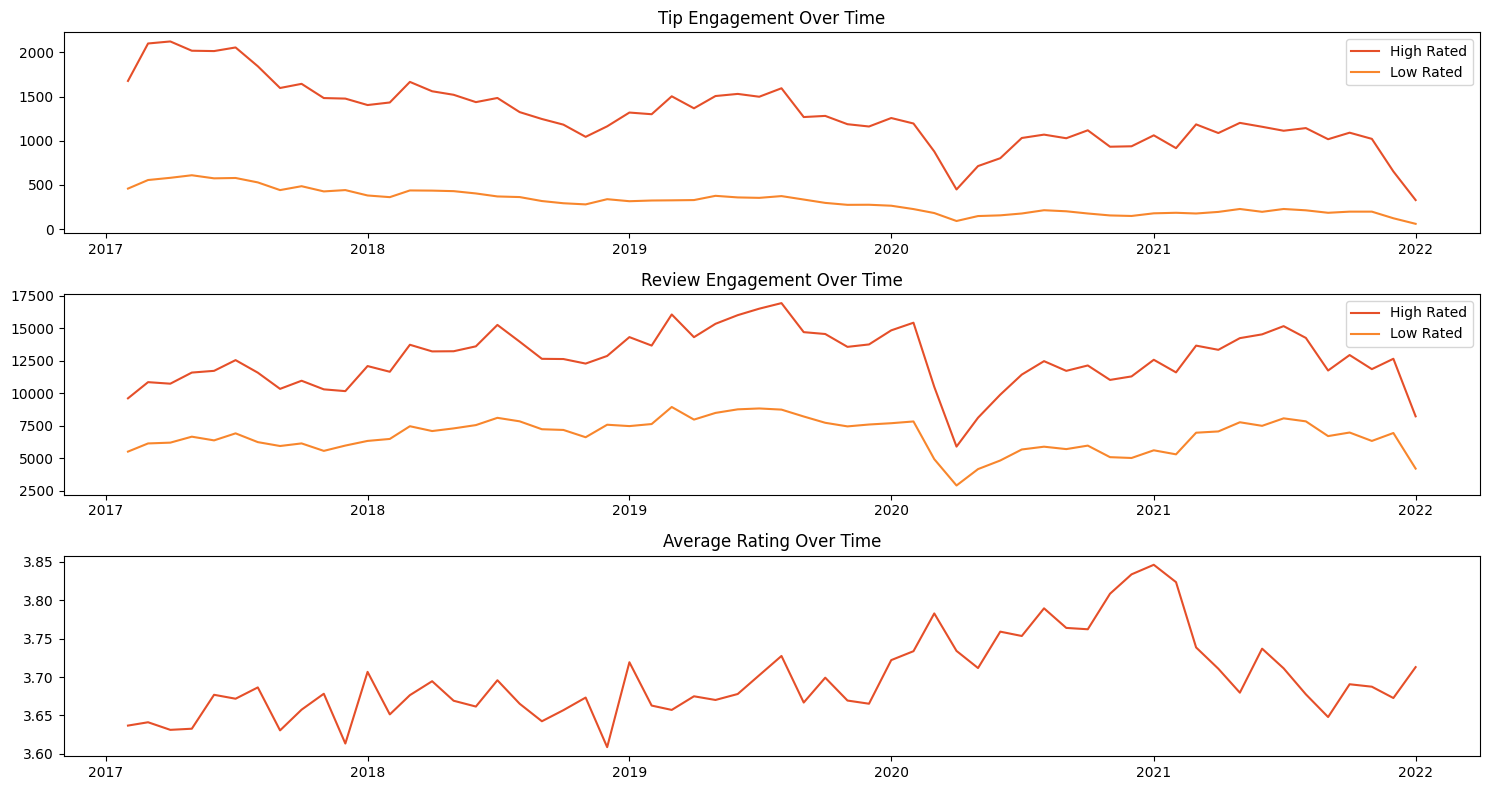

In [53]:
plt.figure(figsize=(15,8))

plt.subplot(3,1,1)
plt.title('Tip Engagement Over Time')
plt.plot(high_rated_engagement['month_year'], 
         high_rated_engagement['tip_count'], 
         label = 'High Rated',
         color = '#E54F29')
plt.plot(low_rated_engagement['month_year'], 
         low_rated_engagement['tip_count'], 
         label = 'Low Rated',
         color = '#F8862C')
plt.legend()

plt.subplot(3,1,2)
plt.title('Review Engagement Over Time')
plt.plot(high_rated_engagement['month_year'], 
         high_rated_engagement['review_count'], 
         label = 'High Rated',
         color = '#E54F29')
plt.plot(low_rated_engagement['month_year'], 
         low_rated_engagement['review_count'], 
         label = 'Low Rated',
         color = '#F8862C')
plt.legend()

plt.subplot(3,1,3)
plt.title('Average Rating Over Time')
plt.plot(time_rating['month_year'], 
         time_rating['avg_rating'],
         color = '#E54F29')

plt.tight_layout()
plt.show()

In [54]:
tip_high_rated = high_rated_engagement[['month_year', 'tip_count']].set_index('month_year')
review_high_rated = high_rated_engagement[['month_year', 'review_count']].set_index('month_year')
rating_df = time_rating[['month_year', 'avg_rating']].set_index('month_year')

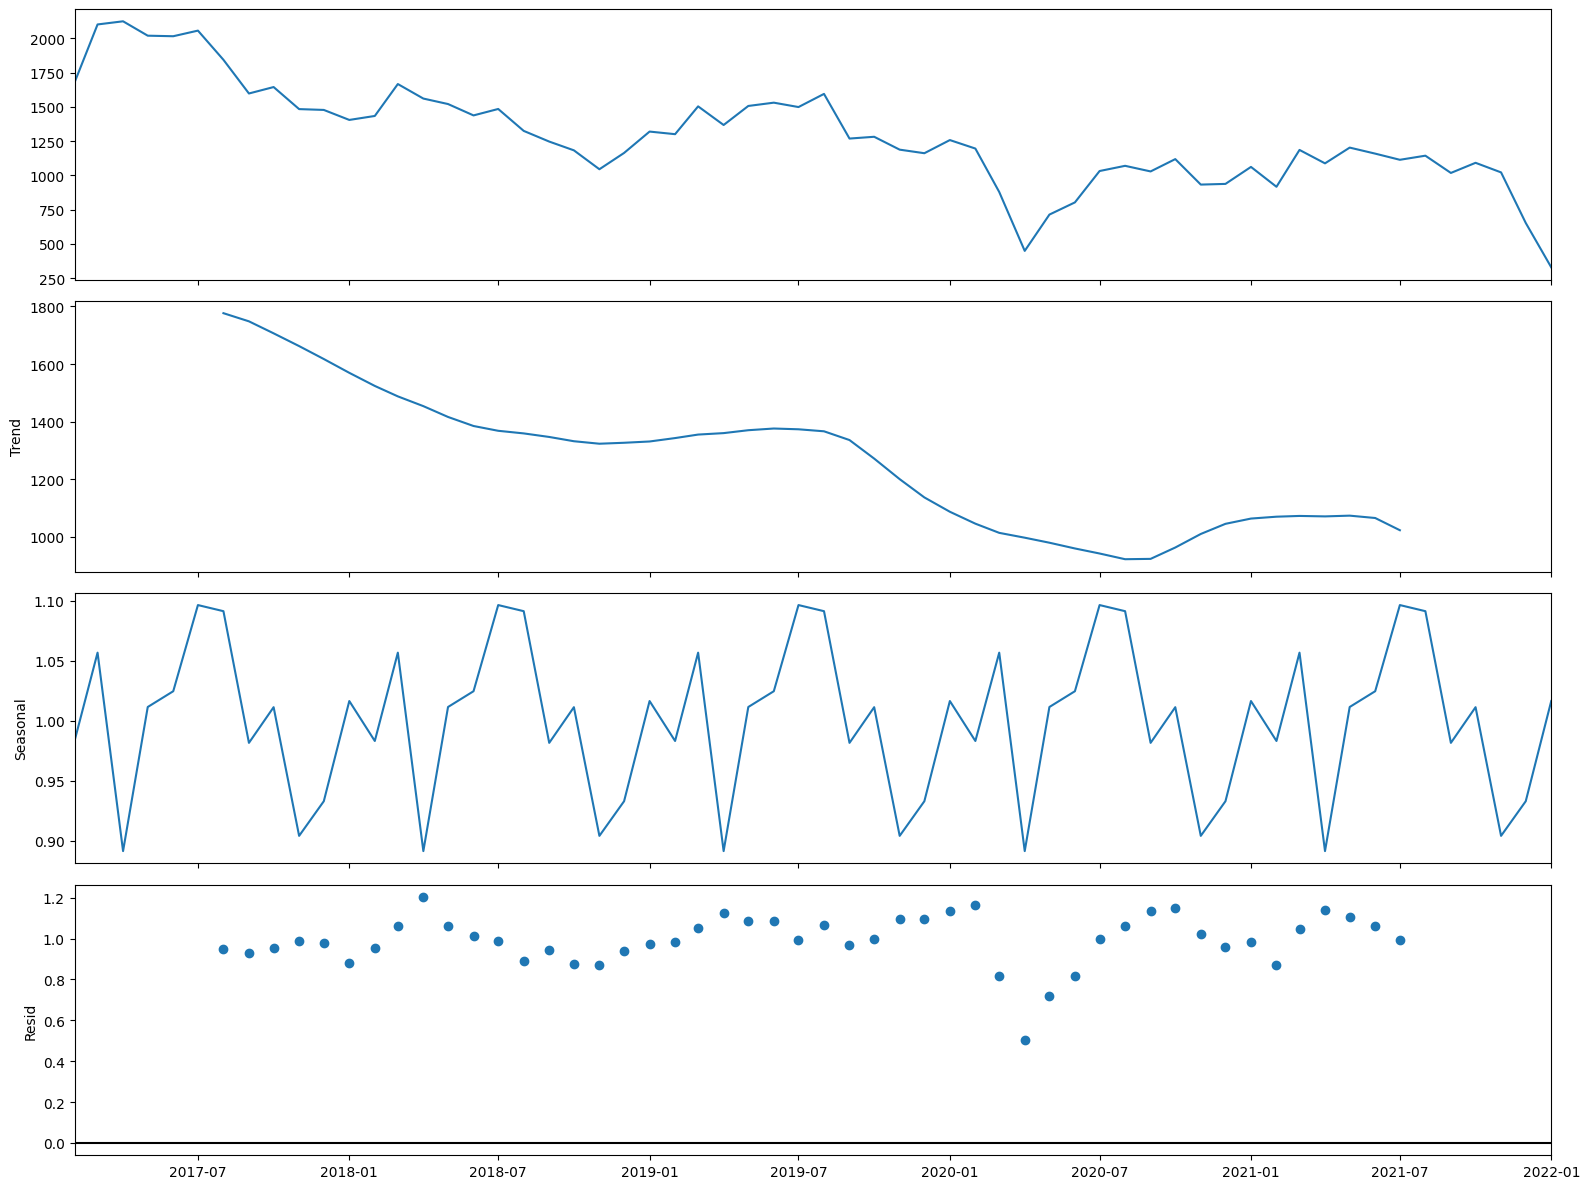

In [57]:
# For tips:
from statsmodels.tsa.seasonal import seasonal_decompose
multiplicative_decomposition = seasonal_decompose(tip_high_rated, model='multiplicative', period=12)
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot()
plt.show()

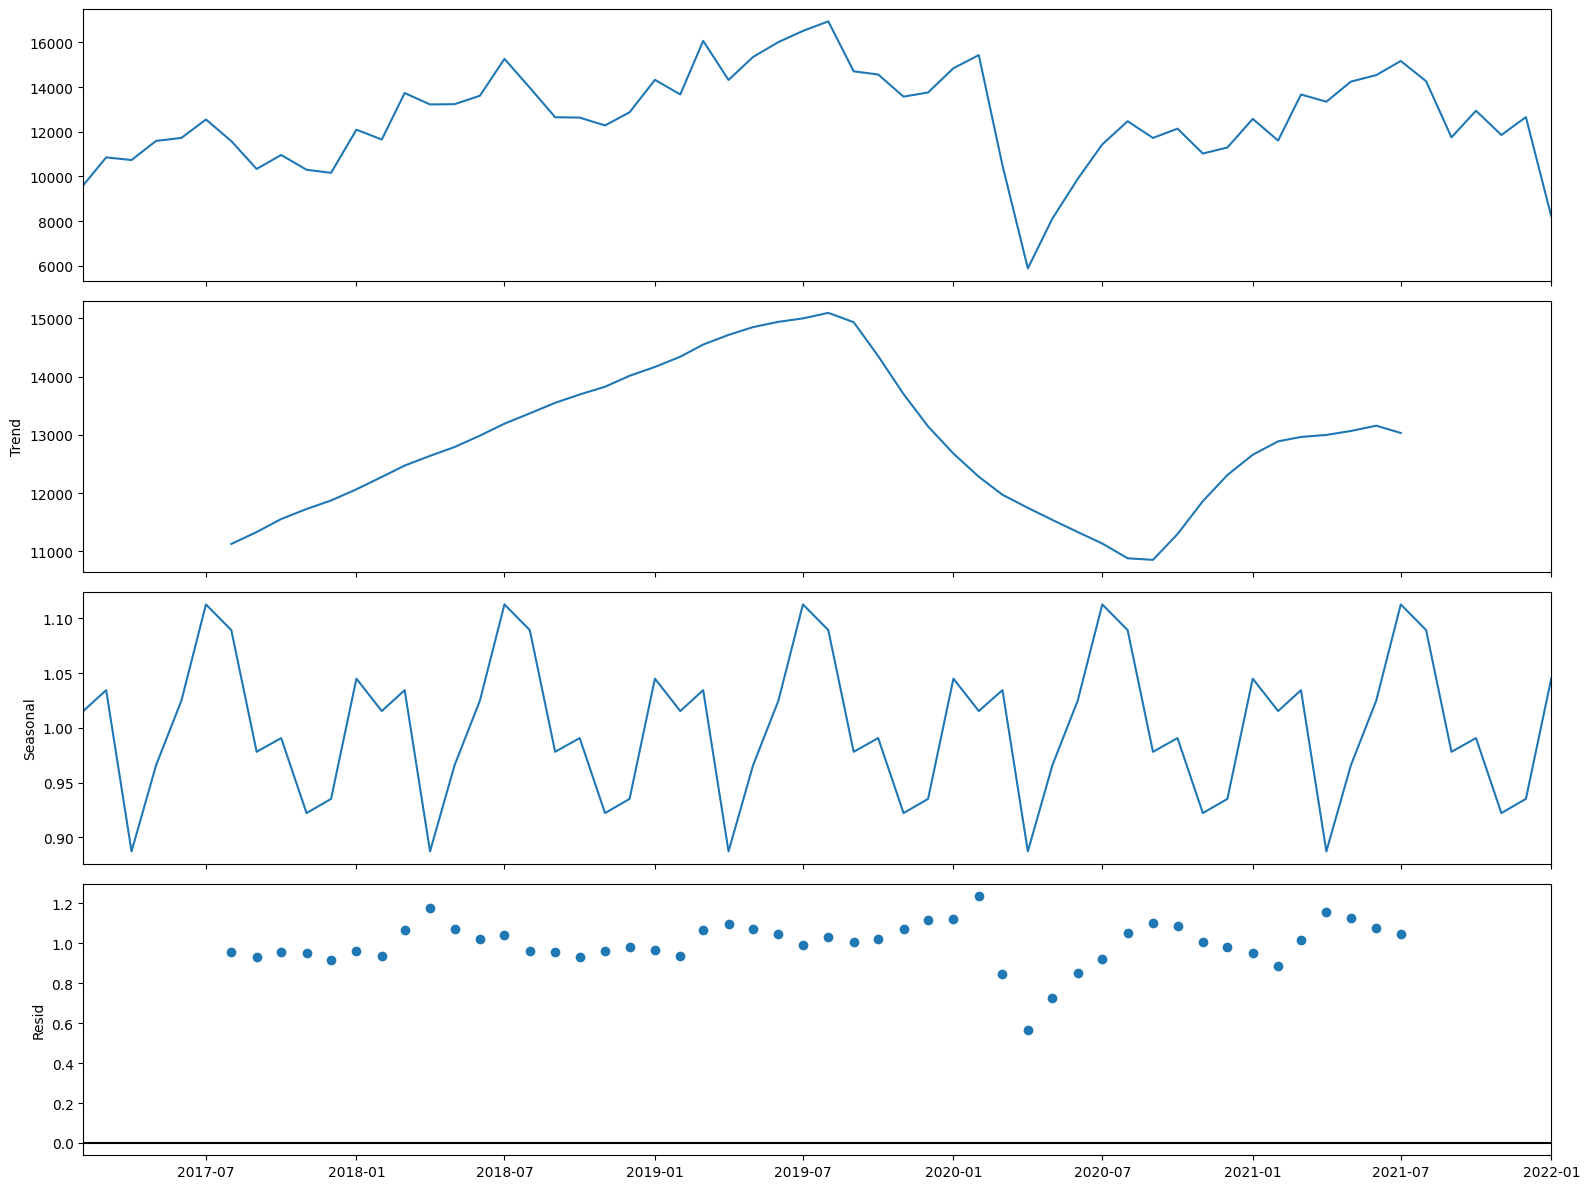

In [58]:
# For reviews:
multiplicative_decomposition = seasonal_decompose(review_high_rated, model='multiplicative', period=12)
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot()
plt.show()

In [60]:
# SENTIMENT ANALYSIS:
# How does the sentiment of reviews and tips correlate with the success metrics of restaurants:
sentiment_df = pd.read_sql_query(f"""
                SELECT 
                    b.business_id, 
                    AVG(b.stars) AS avg_rating, 
                    SUM(b.review_count) AS review_count,
                    SUM(s.useful_count) AS useful_count,
                    SUM(s.funny_count) AS funny_count,
                    SUM(s.cool_count) AS cool_count
                FROM 
                    (SELECT business_id,
                            SUM(useful) AS useful_count,
                            SUM(funny) AS funny_count,
                            SUM(cool) AS cool_count
                    FROM review
                    GROUP BY business_id) AS s 
                JOIN business as b
                ON b.business_id = s.business_id
                WHERE b.business_id IN {tuple(restaurant_business['business_id'])}
                GROUP BY b.business_id
                ORDER BY review_count;""", conn)


In [62]:
#Remove outliers before modelling:
sentiment_df = remove_outliers(sentiment_df, 'review_count')
sentiment_df = remove_outliers(sentiment_df, 'useful_count')
sentiment_df = remove_outliers(sentiment_df, 'funny_count')
sentiment_df = remove_outliers(sentiment_df, 'cool_count')

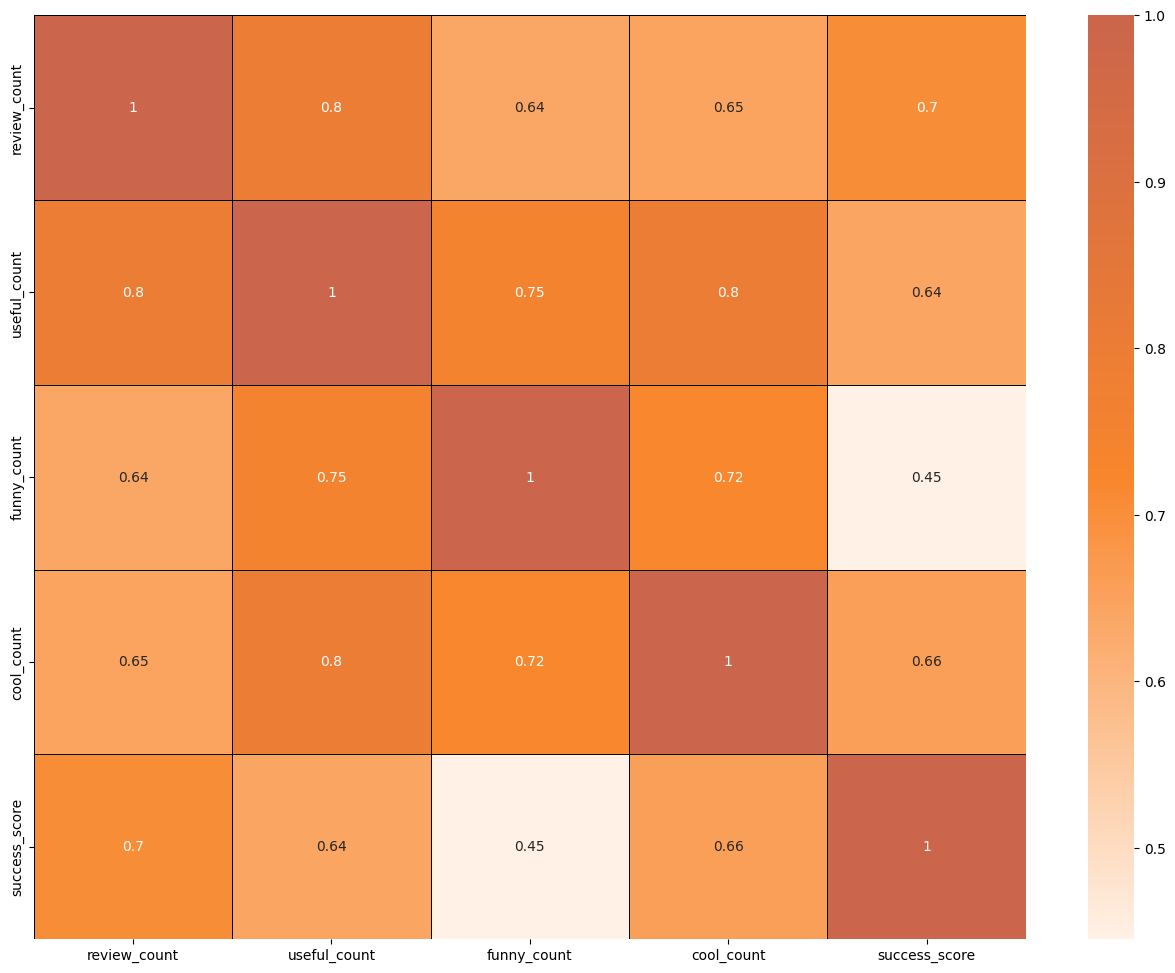

In [63]:
sentiment_df['success_score']=calculate_success_metric(sentiment_df)
#Plotting:
sns.heatmap(data=sentiment_df.iloc[:,2:].corr(),
            cmap=custom_cmap,
            annot=True,
            linewidths=0.5,
            linecolor='black')
plt.show()

In [77]:
# Check for the difference in engagement of elite and non-elite users:
elite_df = pd.read_sql_query("""
                            SELECT 
                                elite,
                                count(*) AS num_users,
                                SUM(review_count) AS total_review_count
                            FROM 
                                (SELECT 
                                    CASE WHEN elite = '' THEN 'Non-Elite' ELSE 'Elite' END AS elite,
                                    u.review_count
                                FROM users u
                                ) AS user_elite
                            GROUP BY elite;""", conn)

In [78]:
elite_df

,elite,num_users,total_review_count
0,Elite,25870,8030231
1,Non-Elite,181804,5113903


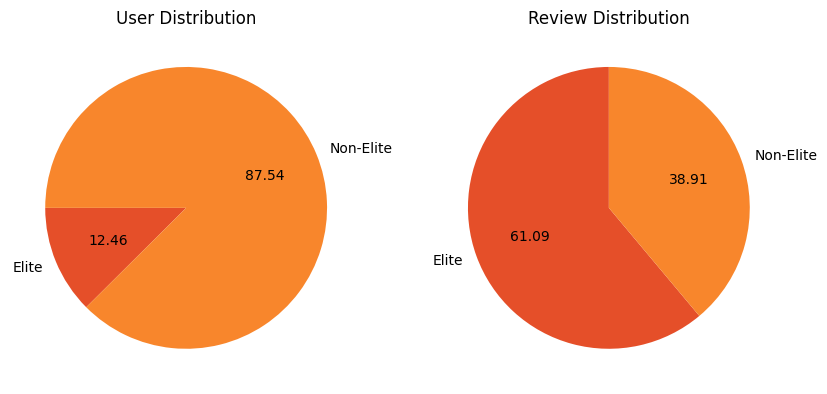

In [80]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('User Distribution')
plt.pie(elite_df['num_users'], 
        labels=elite_df['elite'],
        autopct='%.2f',
        startangle=180,
        colors=['#E54F29', '#F8862C'])

plt.subplot(1,2,2)
plt.title('Review Distribution')
plt.pie(elite_df['total_review_count'], 
        labels=elite_df['elite'],
        autopct='%.2f',
        startangle=90,
        colors=['#E54F29', '#F8862C'])
plt.show()

In [82]:
# What are the busiest hours for restaurants:
review_engagement = pd.read_sql_query("""
                                    SELECT 
                                        cast(strftime('%H', date) AS integer) AS hour,
                                        count(*) AS review_count
                                    FROM review
                                    GROUP BY hour;
                                    """, conn)
tip_engagement = pd.read_sql_query("""
                                    SELECT
                                        cast(strftime('%H', date) AS integer) AS hour,
                                        count(*) AS tip_count
                                    FROM tips
                                    GROUP BY hour;""", conn)
checkin_df = pd.read_sql_query("""
                                    SELECT date
                                    FROM checkin;""", conn)
checkin_engagement = []
for i in checkin_df['date']:
    checkin_engagement.extend([datetime.strptime(j.strip(), "%Y-%m-%d %H:%M:%S").strftime('%H') for j in i.split(',')])

checkin_engagement_df = pd.DataFrame(checkin_engagement).astype('int').groupby(0)[[0]].count()

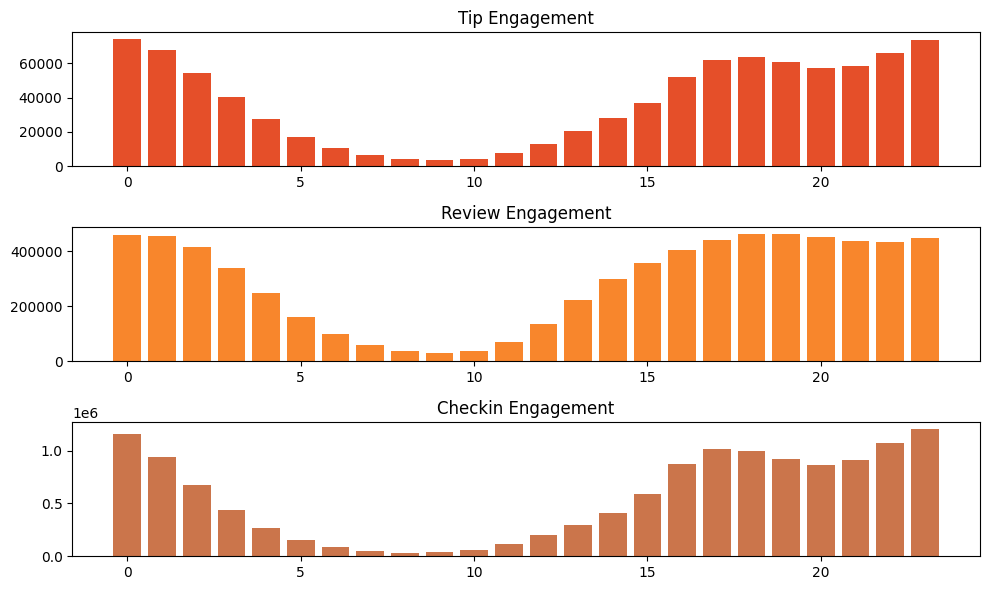

In [84]:
plt.figure(figsize=(10,6))

plt.subplot(3,1,1)
plt.title('Tip Engagement')
plt.bar(x=tip_engagement['hour'],
        height=tip_engagement['tip_count'],
        color = '#E54F29')

plt.subplot(3,1,2)
plt.title('Review Engagement')
plt.bar(x=review_engagement['hour'],
        height=review_engagement['review_count'],
        color = '#F8862C')

plt.subplot(3,1,3)
plt.title('Checkin Engagement')
plt.bar(x=checkin_engagement_df.index,
        height=checkin_engagement_df[0],
        color = '#CB754B')

plt.tight_layout()
plt.show()